# PHASE 1 PROJECT

## INTRODUCTION

The above project focuses on a company that is interested in purchasing and operating airplanes for commercial and private enterprises.

The company has given out dataset that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and internatonal waters.

## Business Understanding

### Objective of the project: 

To determine which aircraft has the lowest risk for the company to use in starting their new business endeavor.

Using the dataset, we can look at some elements such as:
* casualties from the accidents
* which aircrafts had the most casualties
* their model
* engines, etc
to see which aircraft are risky to invest in and which are not.

## Data Understanding

The dataset used was downloaded from [kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses).

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Downloads/Documents/AviationData.csv', encoding = 'latin-1', low_memory = False)
# low_memory = False stops an error message and makes the memory not to be full.
df.head(10) # View the first 10 entries of the dataframe

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [3]:
df.tail() # Prints the last 5 entries

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
df.info() # Prints information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
df.shape # Prints rows and columns of the dataframe

(88889, 31)

In [6]:
df.dtypes # Checks datatypes of the columns

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [7]:
df.columns # Prints the columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
df.describe() # Statistical summary

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
df.isnull().sum() # Prints the number of missing values in each column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

### Observation

The above dataframe consists of:
* 88889 rows and 31 columns
* Has some columns with null values
* The columns have both categorical and numeric data.

## Data Preparation 

This is where data cleaning comes in, formatting data is done and others.

In [10]:
# First check for any duplicates
df.duplicated().sum()

0

No duplicates.

### Dealing with missing values and placeholders

In [11]:
# Check for missing values
df.isna().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

In [12]:
# Number of missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [13]:
# Choosing specific columns to use in achieving the objective
# Creating a list of the relevant columns
relevant_columns = [
    'Event.Id', 'Location', 'Country', 'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
    'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'
]

In [14]:
df = df.loc[:, relevant_columns]
df

,Event.Id,Location,Country,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,"MOOSE CREEK, ID",United States,NaN,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,"BRIDGEPORT, CA",United States,NaN,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,"Saltville, VA",United States,NaN,Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,"EUREKA, CA",United States,NaN,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,"Canton, OH",United States,NaN,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,"Annapolis, MD",United States,NaN,PIPER,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,"Hampton, NH",United States,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,"Payson, AZ",United States,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,"Morgan, UT",United States,NaN,CESSNA,210N,NaN,NaN,0.0,0.0,0.0,0.0,NaN


In [15]:
df['Aircraft.Category'].unique() # Prints the values in the columns

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [16]:
df['Aircraft.Category'].value_counts() # Values of the column and number of times appeared.

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [17]:
# Fill in the missing values using the mode, which is airplane
df['Aircraft.Category'].fillna(value = 'Airplane', inplace = True) # Inplace = True ensures that changes are made to the original file

In [18]:
df.isna().sum()

Event.Id                      0
Location                     52
Country                     226
Aircraft.Category             0
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7096
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [19]:
df['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

In [20]:
# Calculate the median for the column and then use it to fill in the missing values
number_of_engines_median = df['Number.of.Engines'].median()

In [21]:
# Fill in the missing values using median
df['Number.of.Engines'].fillna(number_of_engines_median, inplace = True)

In [22]:
df.isna().sum()

Event.Id                      0
Location                     52
Country                     226
Aircraft.Category             0
Make                         63
Model                        92
Number.of.Engines             0
Engine.Type                7096
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [23]:
# Use median to fill in the missing values in total fatal injuries column
total_fatal_injuries_median = df['Total.Fatal.Injuries'].median()
df['Total.Fatal.Injuries'].fillna(total_fatal_injuries_median, inplace = True) # Fill in the missing values

In [24]:
df.isna().sum()

Event.Id                      0
Location                     52
Country                     226
Aircraft.Category             0
Make                         63
Model                        92
Number.of.Engines             0
Engine.Type                7096
Total.Fatal.Injuries          0
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [25]:
# Fill in the missing values using the median of total seriuos injuries
# I have calculated using the mode, resulting in the same thing, (0.0).
total_serious_injuries_median = df['Total.Serious.Injuries'].median()
df['Total.Serious.Injuries'].fillna(total_serious_injuries_median, inplace = True)

In [26]:
df.isna().sum()

Event.Id                      0
Location                     52
Country                     226
Aircraft.Category             0
Make                         63
Model                        92
Number.of.Engines             0
Engine.Type                7096
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [27]:
# Filling the missing values in total minor injuries using median
# Same results when using mode, (0.0).
total_minor_injuries_median = df['Total.Minor.Injuries'].median()
df['Total.Minor.Injuries'].fillna(total_minor_injuries_median, inplace = True)

In [28]:
df.isnull().sum()

Event.Id                     0
Location                    52
Country                    226
Aircraft.Category            0
Make                        63
Model                       92
Number.of.Engines            0
Engine.Type               7096
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured           5912
Weather.Condition         4492
dtype: int64

In [29]:
df['Total.Uninjured'].fillna(value = df['Total.Uninjured'].median(), inplace = True)
df.isna().sum()

Event.Id                     0
Location                    52
Country                    226
Aircraft.Category            0
Make                        63
Model                       92
Number.of.Engines            0
Engine.Type               7096
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition         4492
dtype: int64

In [30]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [31]:
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    77303
IMC     5976
UNK      856
Unk      262
Name: count, dtype: int64

In [32]:
# UNK and Unk are the same thing, both refer to unknown. So Unk has been used as a placeholder
# Transfer the values in Unk to UNK
df['Weather.Condition'] = df['Weather.Condition'].replace('Unk', 'UNK')

In [33]:
df['Weather.Condition'].value_counts() # Confirms if the values have been transferred

Weather.Condition
VMC    77303
IMC     5976
UNK     1118
Name: count, dtype: int64

In [34]:
# If UNK stands for Unknown, the missing values(nan) can also be included in the UNK value
df['Weather.Condition'].fillna(value = 'UNK', inplace=True)
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    77303
IMC     5976
UNK     5610
Name: count, dtype: int64

In [35]:
df.isna().sum()

Event.Id                     0
Location                    52
Country                    226
Aircraft.Category            0
Make                        63
Model                       92
Number.of.Engines            0
Engine.Type               7096
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
dtype: int64

In [36]:
df['Engine.Type'].value_counts()

Engine.Type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [37]:
# Filling the missing values of engine type column using mode('Reciprocating')
df['Engine.Type'].fillna(value = 'Reciprocating', inplace=True)

In [38]:
df.isna().sum()

Event.Id                    0
Location                   52
Country                   226
Aircraft.Category           0
Make                       63
Model                      92
Number.of.Engines           0
Engine.Type                 0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
dtype: int64

I have found another way to deal with the numeric data and fill in missing values using median after doing research.

In [39]:
# df.fillna(df.median(numeric_only = True), inplace=True) # Fills missing values with median only for the numeric values
# df.isna().sum()

In [40]:
df['Country'].value_counts()

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

In [41]:
# Fill the missing values with the mode(United States)
df['Country'].fillna('United States', inplace=True)

In [42]:
df.isna().sum()

Event.Id                   0
Location                  52
Country                    0
Aircraft.Category          0
Make                      63
Model                     92
Number.of.Engines          0
Engine.Type                0
Total.Fatal.Injuries       0
Total.Serious.Injuries     0
Total.Minor.Injuries       0
Total.Uninjured            0
Weather.Condition          0
dtype: int64

In [43]:
# Calculate the missing value percentages of the columns with missing values
df.isna().sum() * 100 / len(df)

Event.Id                  0.000000
Location                  0.058500
Country                   0.000000
Aircraft.Category         0.000000
Make                      0.070875
Model                     0.103500
Number.of.Engines         0.000000
Engine.Type               0.000000
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Weather.Condition         0.000000
dtype: float64

In [44]:
# Location is 0.05, make is 0.07 and model is 0.10. In this case, we can drop the rows with missing values
# Dropping rows with missing values
df.dropna(inplace=True)

In [45]:
df.isna().sum() # Checks for null values in each column

Event.Id                  0
Location                  0
Country                   0
Aircraft.Category         0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

In [46]:
df.reset_index(drop=True) # Sets the index to be the same as the number of rows

,Event.Id,Location,Country,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,"MOOSE CREEK, ID",United States,Airplane,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,"BRIDGEPORT, CA",United States,Airplane,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,"Saltville, VA",United States,Airplane,Cessna,172M,1.0,Reciprocating,3.0,0.0,0.0,1.0,IMC
3,20001218X45448,"EUREKA, CA",United States,Airplane,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,"Canton, OH",United States,Airplane,Cessna,501,1.0,Reciprocating,1.0,2.0,0.0,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88720,20221227106491,"Annapolis, MD",United States,Airplane,PIPER,PA-28-151,1.0,Reciprocating,0.0,1.0,0.0,0.0,UNK
88721,20221227106494,"Hampton, NH",United States,Airplane,BELLANCA,7ECA,1.0,Reciprocating,0.0,0.0,0.0,0.0,UNK
88722,20221227106497,"Payson, AZ",United States,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC
88723,20221227106498,"Morgan, UT",United States,Airplane,CESSNA,210N,1.0,Reciprocating,0.0,0.0,0.0,0.0,UNK


In [47]:
df.shape # Prints a tuple containing the rows and columns in the dataframe

(88725, 13)

In [48]:
df['Make'].value_counts()

Make
Cessna           22217
Piper            12024
CESSNA            4919
Beech             4325
PIPER             2840
                 ...  
Conrad Menzel        1
Blucher              1
Gideon               1
Brault               1
ROYSE RALPH L        1
Name: count, Length: 8224, dtype: int64

In [49]:
# Removes the values that are similar but different because of their format and also removes whitespaces
df['Make'] = df['Make'].str.strip().str.title()

In [50]:
df['Make'].value_counts()

Make
Cessna                   27136
Piper                    14864
Beech                     5366
Boeing                    2727
Bell                      2717
                         ...  
Mckinnis                     1
Aeronca-Bubeck Irving        1
Trike                        1
Aero Comp Inc                1
Royse Ralph L                1
Name: count, Length: 7575, dtype: int64

In [51]:
df['Model'] = df['Model'].str.strip().str.title()

In [52]:
df['Model'].value_counts()

Model
152                     2365
172                     1755
172N                    1164
Pa-28-140                932
150                      829
                        ... 
Bushby Mustang M-Ii        1
Harvard Mk Ii              1
Uc45J                      1
Super Acro Zenith Ch       1
M-8 Eagle                  1
Name: count, Length: 11630, dtype: int64

In [53]:
df['Location'] = df['Location'].str.strip().str.upper()

In [54]:
df['Location'].value_counts()

Location
ANCHORAGE, AK      548
MIAMI, FL          275
HOUSTON, TX        271
ALBUQUERQUE, NM    265
CHICAGO, IL        255
                  ... 
LEVANT, KS           1
GOOD HOPE, IL        1
TROY, NY             1
RASSELLAS, PA        1
BRASNORTE,           1
Name: count, Length: 21945, dtype: int64

In [55]:
# Check for placeholders in the columns
for col in relevant_columns:
    print(f'{col}:{df[col].unique()}')

Event.Id:['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']
Location:['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'SALTVILLE, VA' ... 'SAN MANUAL, AZ'
 'AUBURN HILLS, MI' 'BRASNORTE,']
Country:['United States' 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Angola' 'Germany' 'Korea, Republic Of'
 'American Samoa' 'PACIFIC OCEAN' 'Canada' 'Bolivia' 'Mexico' 'Dominica'
 'Netherlands Antilles' 'Iceland' 'Greece' 'Guam' 'Australia'
 'CARIBBEAN SEA' 'West Indies' 'Japan' 'Philippines' 'Venezuela' 'Bermuda'
 'San Juan Islands' 'Colombia' 'El Salvador' 'United Kingdom'
 'British Virgin Islands' 'Netherlands' 'Costa Rica' 'Mozambique'
 'Jamaica' 'Panama' 'Guyana' 'Norway' 'Portugal' 'Malaysia'
 'Turks And Caicos Islands' 'Northern Mariana Islands'
 'Dominican Republic' 'Suriname' 'Honduras' 'Congo' 'Belize' 'Guatemala'
 'France' 'St Vincent And The Grenadines' 'Haiti' 'Papua New Guinea'
 'Cayman Islands' 'Swed

No placeholders

### Dealing with outliers

I decided to use box plots to identify my outliers.

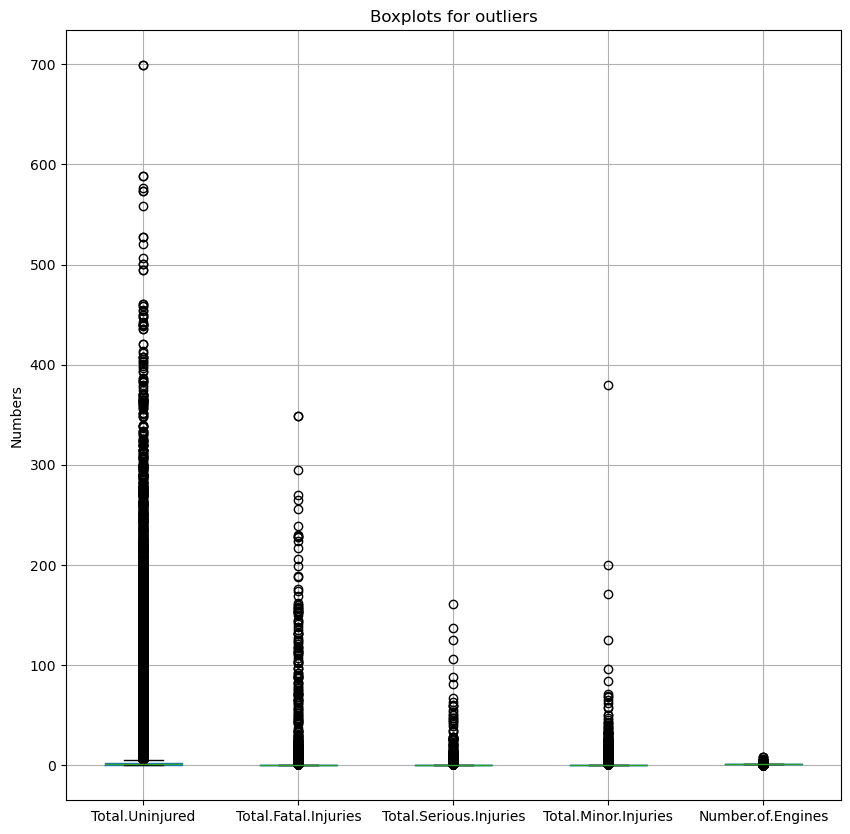

In [56]:
# Check for outliers
plt.figure(figsize=(10,10))
x = ['Total.Uninjured', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Number.of.Engines']
df[x].boxplot(x) # Use .boxplot to plot the boxplot
plt.title('Boxplots for outliers') # Title of the plot
plt.ylabel('Numbers'); # Y label of the plot

From the above boxplot, the columns have several outliers. I cannot remove the outliers as I will be using them in my analysis.

### Standardizing formats

In [57]:
# Casualties in accidents are fully counted; there's no such thing as half a person.
# In this case, the floats should be integers.
casualties = ['Total.Uninjured', 'Total.Serious.Injuries', 'Total.Fatal.Injuries',
              'Total.Minor.Injuries', 'Number.of.Engines'] # list of the columns to be modified
df[casualties] = df[casualties].astype('int64') # Changes float values to integers

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88725 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88725 non-null  object
 1   Location                88725 non-null  object
 2   Country                 88725 non-null  object
 3   Aircraft.Category       88725 non-null  object
 4   Make                    88725 non-null  object
 5   Model                   88725 non-null  object
 6   Number.of.Engines       88725 non-null  int64 
 7   Engine.Type             88725 non-null  object
 8   Total.Fatal.Injuries    88725 non-null  int64 
 9   Total.Serious.Injuries  88725 non-null  int64 
 10  Total.Minor.Injuries    88725 non-null  int64 
 11  Total.Uninjured         88725 non-null  int64 
 12  Weather.Condition       88725 non-null  object
dtypes: int64(5), object(8)
memory usage: 9.5+ MB


## Data Analysis

This is where Exploratory Data Analysis(EDA) comes in.
This is where visualizations is majorly done in order to get useful insights from the data.

### Univariate Analysis.

I'm doing this so that I can understand a column and how its values have been distributed.

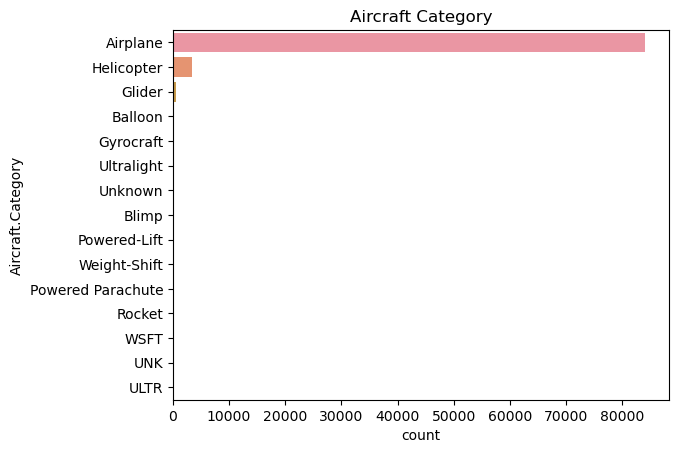

In [59]:
# Using seaborn to plot a countplot horizontally
ax = sns.countplot(data = df, y = 'Aircraft.Category')
ax.set_title('Aircraft Category'); # Set the title

**Observation**<br>
Most of the aircrafts involved in accidents are aiplanes.

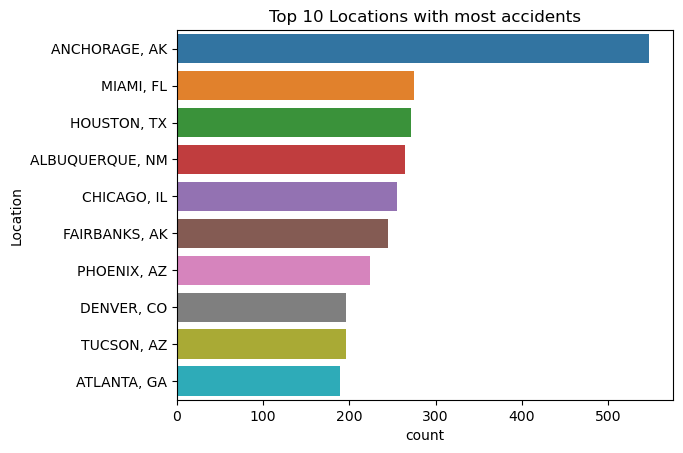

In [60]:
# Using seaborn to plot a countplot horizontally
# Get the top 10 most frequent locations
top_locations = df['Location'].value_counts().head(10).index

ax = sns.countplot(data=df[df['Location'].isin(top_locations)], y='Location', order=top_locations)
ax.set_title('Top 10 Locations with most accidents');

**Observation**<br>
The location with most accidents is Anchorage, Ak, and Miami.Fl.

### Bivariate Analysis and Multivariate Analysis

Involves analysis using two variables.

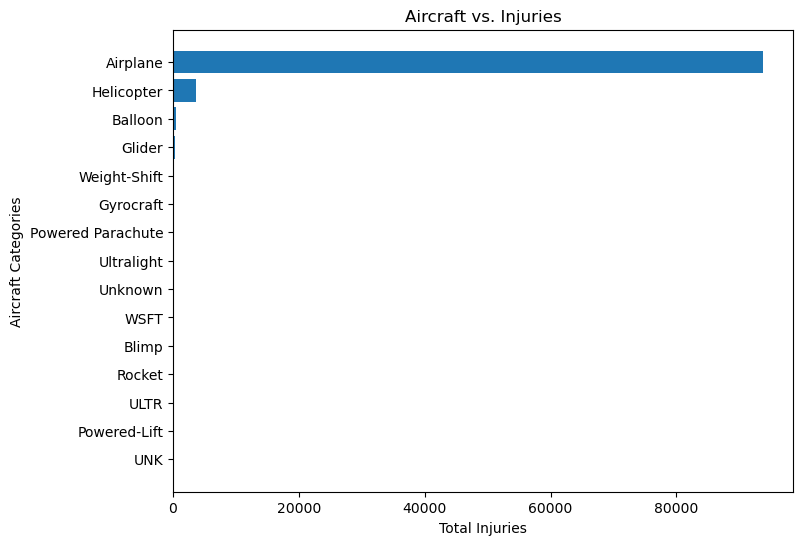

In [61]:
# Using a horizontal bar graph to plot injuries vs aircraft category
figure, ax = plt.subplots(figsize=(8,6))
# Use groupby() to combine groups and make analysis on them
injuries = df.groupby(['Aircraft.Category'])[['Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
# Create a new column filled with the total number of all the injured people
injuries['Total.Injuries'] = injuries.sum(axis=1) 
# Sort the injuries in descending order
injuries = injuries.sort_values(by='Total.Injuries', ascending=True)
# Plot the bar graph
ax.barh(injuries.index, injuries['Total.Injuries'])
ax.set_title('Aircraft vs. Injuries') # Set the title
ax.set_xlabel('Total Injuries') # Set the x-axis label
ax.set_ylabel('Aircraft Categories'); # Set the y-axis label

**Observation**<br>
Airplane has the most number of injured people from their accidents followed by helicopter

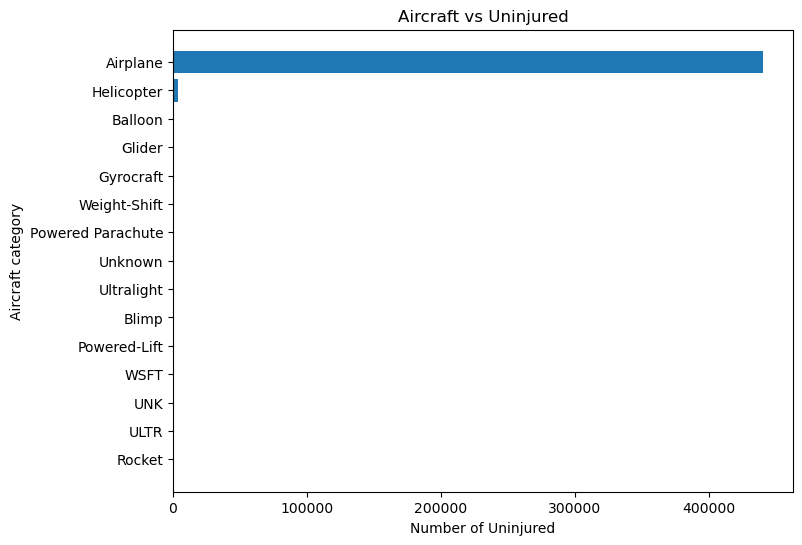

In [62]:
figure, ax = plt.subplots(figsize=(8,6))
uninjured = df.groupby('Aircraft.Category')['Total.Uninjured'].sum()
# Sort the values to be in ascending order
uninjured = uninjured.sort_values(ascending=True)
# Plot the bar graph
ax.barh(uninjured.index, uninjured.values)
ax.set_title('Aircraft vs Uninjured')# Set the title
ax.set_xlabel('Number of Uninjured') # Label the x-axis
ax.set_ylabel('Aircraft category') # label the y-axis
plt.show();

**Observation**<br>
Airplanes also has the least injured in accidents.

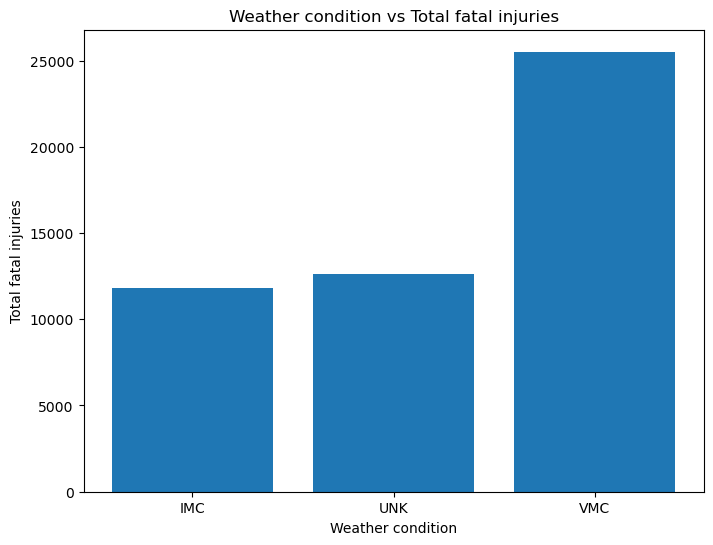

In [63]:
plt.figure(figsize=(8,6))
weather = df.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum()
# Plot the bar graph
plt.bar(weather.index, weather.values)
plt.title('Weather condition vs Total fatal injuries') #Set title
plt.xlabel('Weather condition')# Set x-axis label
plt.ylabel('Total fatal injuries')# set y-axis label
plt.show(); # Show the plot

**Observation**<br>
Most of the fatal injuries occur during the VMC(Visual meteriological conditions), that is, in simple terms, a day with good weather.<br>
While the least occur during IMC(Instrument meteorological conditions), that is, bad weather filled with fog, heavy clouds etc.

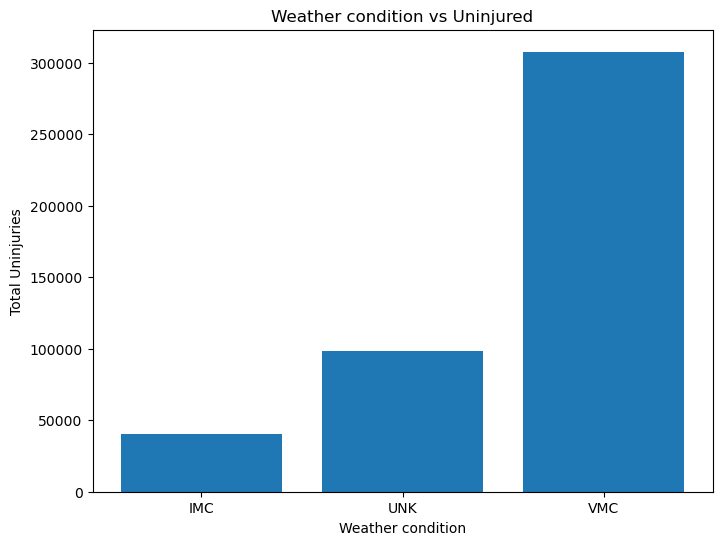

In [64]:
plt.figure(figsize=(8,6))
weather = df.groupby('Weather.Condition')['Total.Uninjured'].sum()
# Plot the bar graph
plt.bar(weather.index, weather.values)
plt.title('Weather condition vs Uninjured') #Set title
plt.xlabel('Weather condition')# Set x-axis label
plt.ylabel('Total Uninjuries')# set y-axis label
plt.show(); # Show the plot

**Observation**<br>
Most of the uninjured travelled on a day with good weather, ie, VMC.

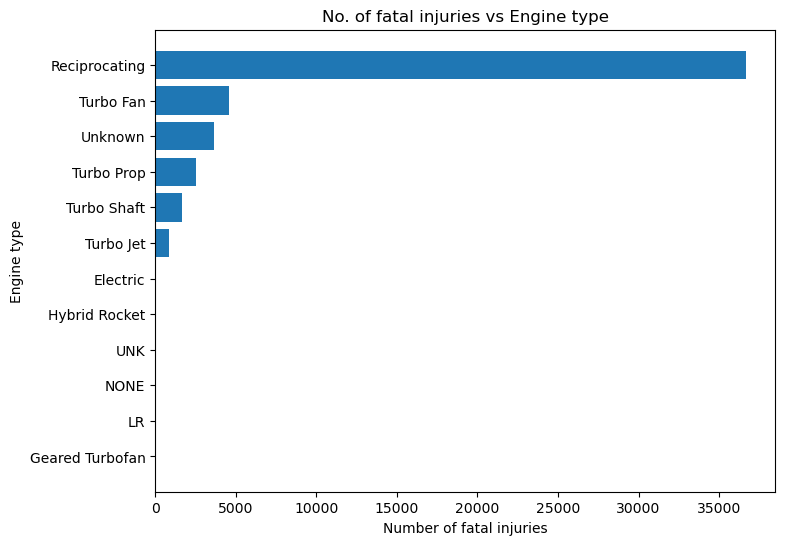

In [65]:
plt.figure(figsize=(8,6)) # The size of the figure
injuries = df.groupby('Engine.Type')['Total.Fatal.Injuries'].sum()
# Sort the values to be in ascending order
injuries = injuries.sort_values(ascending=True)
plt.barh(injuries.index, injuries.values) # Plot the horizontal bar graph
plt.xlabel('Number of fatal injuries') # Set the x-axis label
plt.ylabel('Engine type') # Set the y-axis label
plt.title('No. of fatal injuries vs Engine type')# Set title
plt.show(); # Show the plot

**Observation**<br>
The engine type that is associated with most fatal injuries in accidents is the Reciprocating.

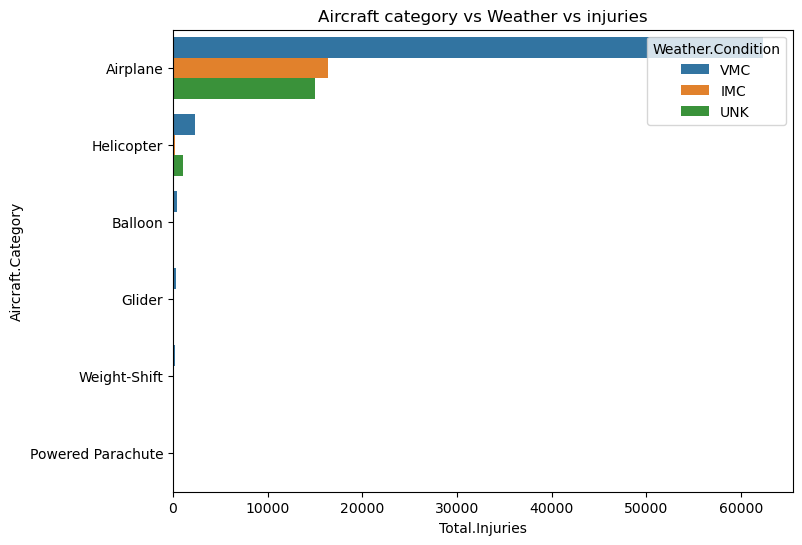

In [66]:
figure, ax = plt.subplots(figsize=(8,6))
# Group the relevant categories and compare them to the number of injuries
injuries = df.groupby(['Aircraft.Category', 'Weather.Condition'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum().reset_index()
# Add the number of injuries
injuries['Total.Injuries'] = injuries[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
# Sort top 10 injuries in each category
top10 = injuries.sort_values(by='Total.Injuries', ascending=False).head(10)
# Plot bar graph using seaborn
sns.barplot(data = top10, x='Total.Injuries', y='Aircraft.Category', hue='Weather.Condition');
ax.set_title('Aircraft category vs Weather vs injuries');

**Observation**<br>
Airplanes have the most injuries especially in the the VMC weather condition.<br>
Helicopters have the least number of injuries when the weather is 'bad', ie, IMC

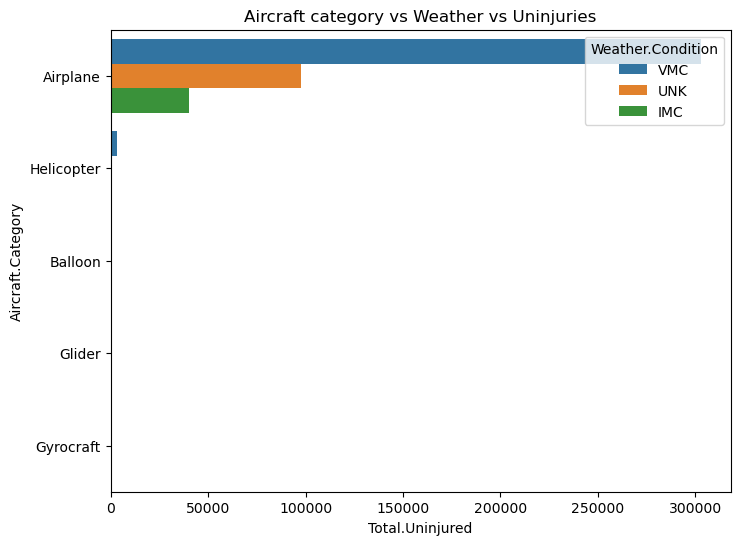

In [67]:
figure, ax = plt.subplots(figsize=(8,6))
# Group the relevant categories and compare them to the number of injuries
injuries = df.groupby(['Aircraft.Category', 'Weather.Condition'])['Total.Uninjured'].sum().reset_index()
# Sort top 10 uninjured in each category
top10 = injuries.sort_values(by='Total.Uninjured', ascending=False).head(10)
# Plot bar graph using seaborn
sns.barplot(data = top10, x='Total.Uninjured', y='Aircraft.Category', hue='Weather.Condition');
ax.set_title('Aircraft category vs Weather vs Uninjuries');

**Observation**<br>
Aiplane in the VMC weather condition have the most uninjured individuals,.

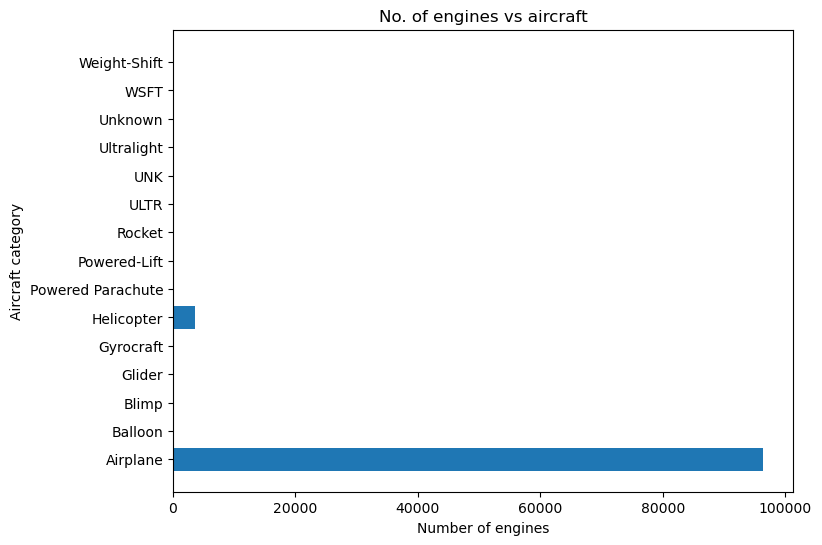

In [68]:
plt.figure(figsize=(8,6)) # The size of the figure
engines = df.groupby('Aircraft.Category')['Number.of.Engines'].sum()
plt.barh(engines.index, engines.values) # Plot the horizontal bar graph
plt.xlabel('Number of engines') # Set the x-axis label
plt.ylabel('Aircraft category') # Set the y-axis label
plt.title('No. of engines vs aircraft')# Set title
plt.show(); # Show the plot

**Observation**<br>
Airplanes have the most number of engines, followed by helicopter.

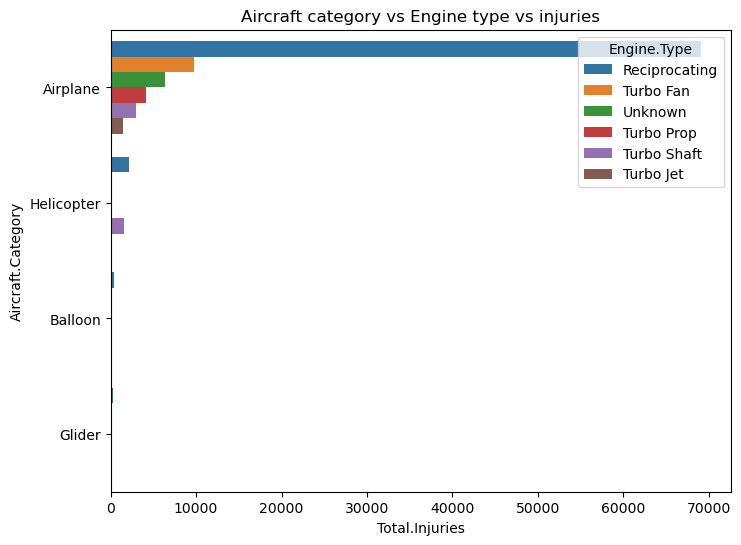

In [69]:
figur, ax = plt.subplots(figsize=(8,6))
# Group the relevant categories and compare them to the number of injuries
injuries = df.groupby(['Aircraft.Category', 'Engine.Type'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum().reset_index()
# Add the number of injuries
injuries['Total.Injuries'] = injuries[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
# Sort top 10 injuries in each category
top10 = injuries.sort_values(by='Total.Injuries', ascending=False).head(10)
# Plot bar graph using seaborn
sns.barplot(data = top10, x='Total.Injuries', y='Aircraft.Category', hue='Engine.Type');
ax.set_title('Aircraft category vs Engine type vs injuries');

**Observation**<br>
If we focus on the airplane, the engine type with less injuries is Turbo Jet while the one with most injuries is Reciprocating.

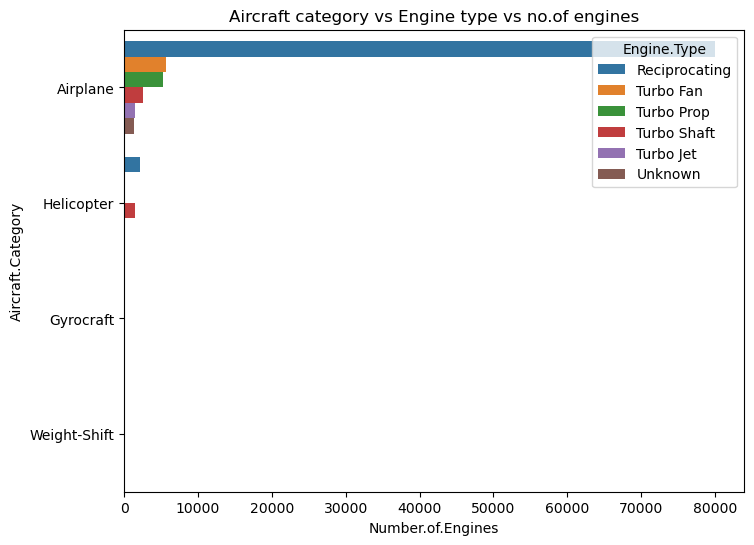

In [70]:
# Group the relevant categories and compare them to the number of injuries
engines = df.groupby(['Aircraft.Category', 'Engine.Type'])['Number.of.Engines'].sum().reset_index()
# Sort top 10 engines in each category
top10 = engines.sort_values(by='Number.of.Engines', ascending=False).head(10)
# Plot bar graph using seaborn
figure, ax = plt.subplots(figsize=(8,6))
sns.barplot(data = top10, x='Number.of.Engines', y='Aircraft.Category', hue='Engine.Type');
ax.set_title('Aircraft category vs Engine type vs no.of engines');

**Observation**<br>
From the above plot, airplane has the most numbers of engines, most of them being Reciprocating engine.

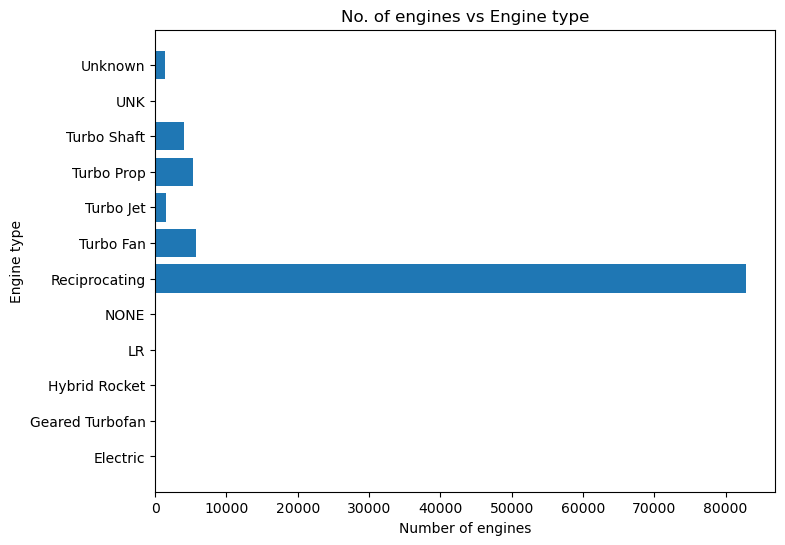

In [71]:
plt.figure(figsize=(8,6)) # The size of the figure
engines = df.groupby('Engine.Type')['Number.of.Engines'].sum()
plt.barh(engines.index, engines.values) # Plot the horizontal bar graph
plt.xlabel('Number of engines') # Set the x-axis label
plt.ylabel('Engine type') # Set the y-axis label
plt.title('No. of engines vs Engine type')# Set title
plt.show(); # Show the plot

**Observation**<br>
Reciprocating has the most number of engines.

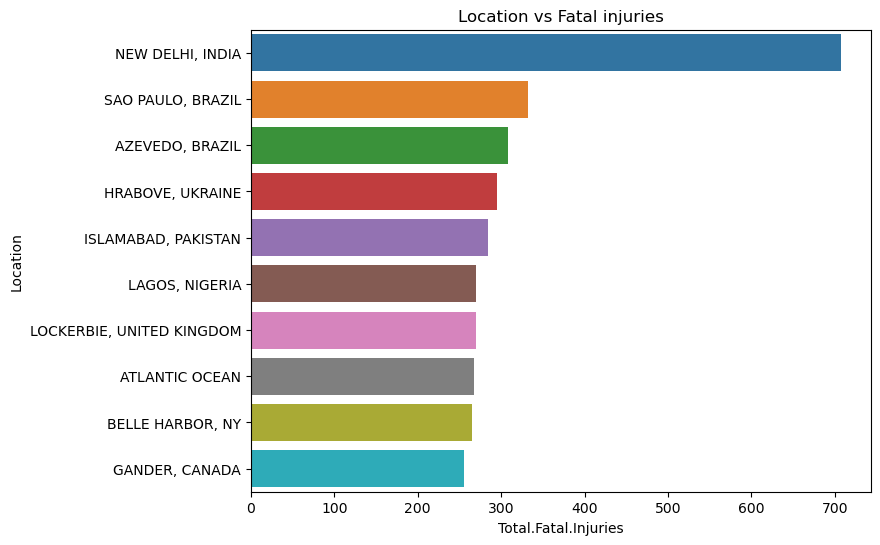

In [72]:
# Group the relevant categories and compare them to the number of injuries
injuries = df.groupby(['Location'])['Total.Fatal.Injuries'].sum().reset_index()
# Sort top 10 engines in each category
top10 = injuries.sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)
# Plot bar graph using seaborn
figure, ax = plt.subplots(figsize=(8,6))
sns.barplot(data = top10, x='Total.Fatal.Injuries', y='Location');
ax.set_title('Location vs Fatal injuries');

**Observation**<br>
According to the above graph, New Delhi, India, had the the most fatal injuries from its accident.

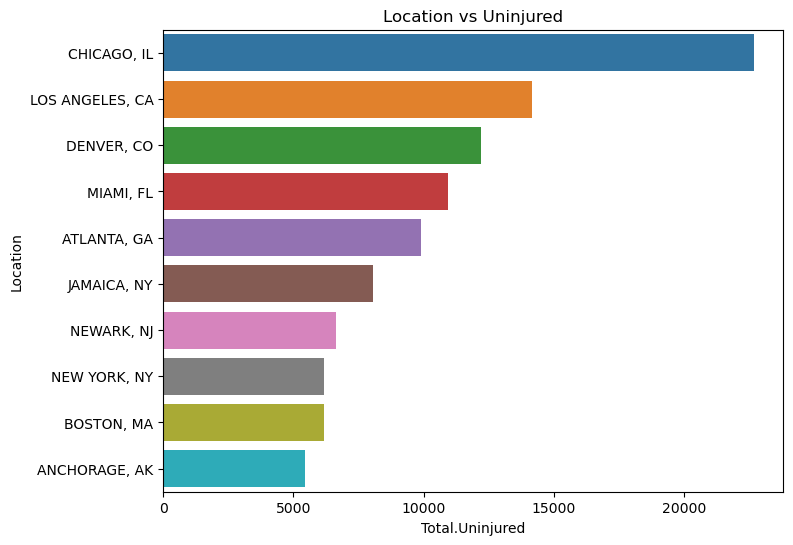

In [73]:
# Group the relevant categories and compare them to the number of injuries
injuries = df.groupby(['Location'])['Total.Uninjured'].sum().reset_index()
# Sort top 10 engines in each category
top10 = injuries.sort_values(by='Total.Uninjured', ascending=False).head(10)
# Plot bar graph using seaborn
figure, ax = plt.subplots(figsize=(8,6))
sns.barplot(data = top10, x='Total.Uninjured', y='Location');
ax.set_title('Location vs Uninjured');

**Observation**<br>
Chicago and Los Angeles have the highest number of uninjured people in the accidents that occured in those locations.

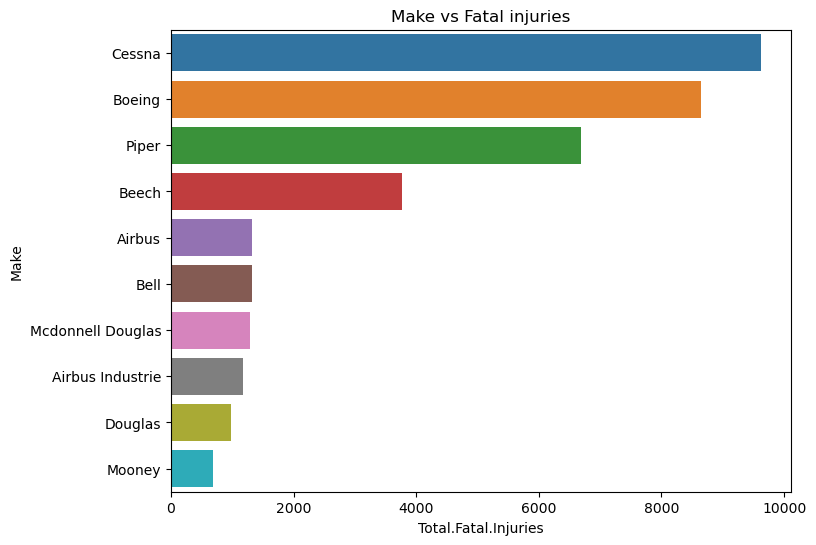

In [74]:
# Group the relevant categories and compare them to the number of injuries
injuries = df.groupby(['Make'])['Total.Fatal.Injuries'].sum().reset_index()
# Sort top 10 engines in each category
top10 = injuries.sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)
# Plot bar graph using seaborn
figure, ax = plt.subplots(figsize=(8,6))
sns.barplot(data = top10, x='Total.Fatal.Injuries', y='Make');
ax.set_title('Make vs Fatal injuries');

**Observation**<br>
Cessna is the make whose accidents have been fatal.

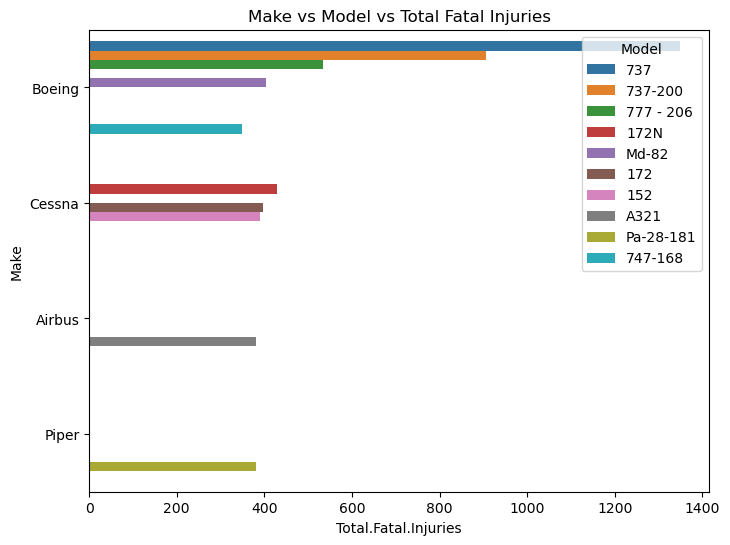

In [75]:
# Group the relevant categories and compare them to the number of injuries
engines = df.groupby(['Make', 'Model'])['Total.Fatal.Injuries'].sum().reset_index()
# Sort top 10 engines in each category
top10 = engines.sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)
# Plot bar graph using seaborn
figure, ax = plt.subplots(figsize=(8,6))
sns.barplot(data = top10, x='Total.Fatal.Injuries', y='Make', hue='Model');
ax.set_title('Make vs Model vs Total Fatal Injuries');

**Observation**<br>
Boeing 737 has had many fatal injuries in their accidents.

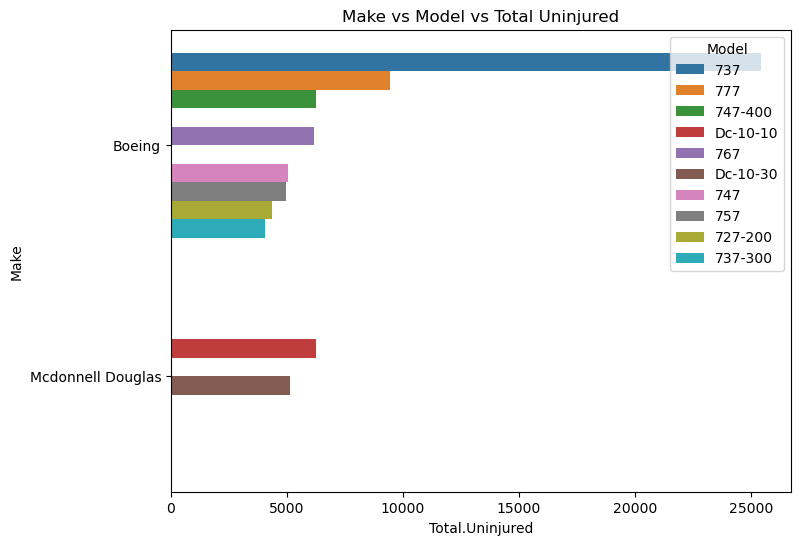

In [76]:
# Group the relevant categories and compare them to the number of injuries
engines = df.groupby(['Make', 'Model'])['Total.Uninjured'].sum().reset_index()
# Sort top 10 engines in each category
top10 = engines.sort_values(by='Total.Uninjured', ascending=False).head(10)
# Plot bar graph using seaborn
figure, ax = plt.subplots(figsize=(8,6))
sns.barplot(data = top10, x='Total.Uninjured', y='Make', hue='Model');
ax.set_title('Make vs Model vs Total Uninjured');

**Observation**<br>
Boeing and Mcdonell Douglas are the makes whose passengers are mostly uninjured in accidents

## Conlusions

* Anchorage and Miami are areas where many accidents occur while Chicago and Los Angeles have more uninjured passengers from their accidents.
* Most accidents happen in VMC weather conditions.
* Airplanes have the highest fatality rate and more uninjured passengers, followed by helicopter.
* Reciprocating engine is connected to a high fatality rate.
* Boeing 737 has had many fatal injuries in their accidents.

In [77]:
# Save the cleaned dataframe to a new csv file to work with in tableau
df.to_csv('Downloads/Documents/Aviation_Cleaned.csv', index=False) 
#Index=False means the indices shouldn't be included in the file
df

,Event.Id,Location,Country,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,"MOOSE CREEK, ID",United States,Airplane,Stinson,108-3,1,Reciprocating,2,0,0,0,UNK
1,20001218X45447,"BRIDGEPORT, CA",United States,Airplane,Piper,Pa24-180,1,Reciprocating,4,0,0,0,UNK
2,20061025X01555,"SALTVILLE, VA",United States,Airplane,Cessna,172M,1,Reciprocating,3,0,0,1,IMC
3,20001218X45448,"EUREKA, CA",United States,Airplane,Rockwell,112,1,Reciprocating,2,0,0,0,IMC
4,20041105X01764,"CANTON, OH",United States,Airplane,Cessna,501,1,Reciprocating,1,2,0,0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,"ANNAPOLIS, MD",United States,Airplane,Piper,Pa-28-151,1,Reciprocating,0,1,0,0,UNK
88885,20221227106494,"HAMPTON, NH",United States,Airplane,Bellanca,7Eca,1,Reciprocating,0,0,0,0,UNK
88886,20221227106497,"PAYSON, AZ",United States,Airplane,American Champion Aircraft,8Gcbc,1,Reciprocating,0,0,0,1,VMC
88887,20221227106498,"MORGAN, UT",United States,Airplane,Cessna,210N,1,Reciprocating,0,0,0,0,UNK
